In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
df = pd.read_csv('document.csv')

In [145]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [147]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

## We need to standardize our model due to:/home/vikramaditya/micromamba/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

In [149]:
# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
logistic = LogisticRegression()
scalar  = StandardScaler()

In [150]:
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)
logistic.fit(X_train_scaled, y_train)

LogisticRegression()

In [151]:
y_pred = logistic.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [152]:
## performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [153]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.7291666666666666
[[95 28]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



## Hyperparameter Tuning and Cross Validation

## GRIDSEARCH CV

In [154]:
model = LogisticRegression()
## More in fo on sklearn logistic page
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag','saga']
params = dict(penalty=penalty, C=c_values, solver=solver)


In [155]:
## GridSearchCV (To find best param for our model)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)

In [156]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [ ]:
grid.fit(X_train_scaled, y_train)

In [158]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [159]:
grid.best_score_

np.float64(0.7794902548725637)

In [160]:
y_pred = grid.predict(X_test_scaled)

In [161]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.7447916666666666
[[102  21]
 [ 28  41]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       123
           1       0.66      0.59      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192



## RANDOMIZED SEARCH CV

In [162]:
from sklearn.model_selection import RandomizedSearchCV

In [163]:
model = LogisticRegression()
randomscv = RandomizedSearchCV(
    estimator=model, param_distributions=params, 
    cv = 5,
    scoring='accuracy',
    n_jobs=-1
)

In [ ]:
randomscv.fit(X_train_scaled, y_train)

In [165]:
randomscv.best_score_

np.float64(0.7759820089955023)

In [166]:
randomscv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 1.0}

In [167]:
y_pred = randomscv.predict(X_test_scaled)
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.71875
[[95 28]
 [26 43]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.62      0.61        69

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



## Logistic Regression for  Multiclass Classificaation (OVR - One Versus Rest)

In [1]:
from sklearn.datasets import make_classification
##We create our own new dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=15)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
logistic = OneVsRestClassifier(LogisticRegression(), n_jobs=-1)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

0.788
[[65  7  6]
 [ 3 66 22]
 [ 9  6 66]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        78
           1       0.84      0.73      0.78        91
           2       0.70      0.81      0.75        81

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



## Logistic Regression With ROC curve and ROC AUC score
(Receiver Operating Characteristic Curve)

In [46]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [47]:
#Generate two calss dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [49]:
# generate a no skill prediction, dummy model with all zeros (majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
# Prediction based on probability
model_prob = model.predict_proba(X_test)

In [52]:
# Lets focus on +ve values, 1
model_prob = model_prob[:, 1]

In [53]:
# Calculate score
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


## WHat is ROC curve : If we plot TPR in y axis and FPR in x axis we get ROC 
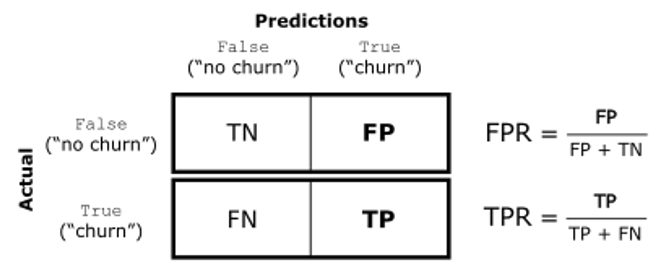

In [54]:
## Calculater ROC Curves
dummy_fpr, dummy_tpr, threshold = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, threshold = roc_curve(y_test, model_prob)

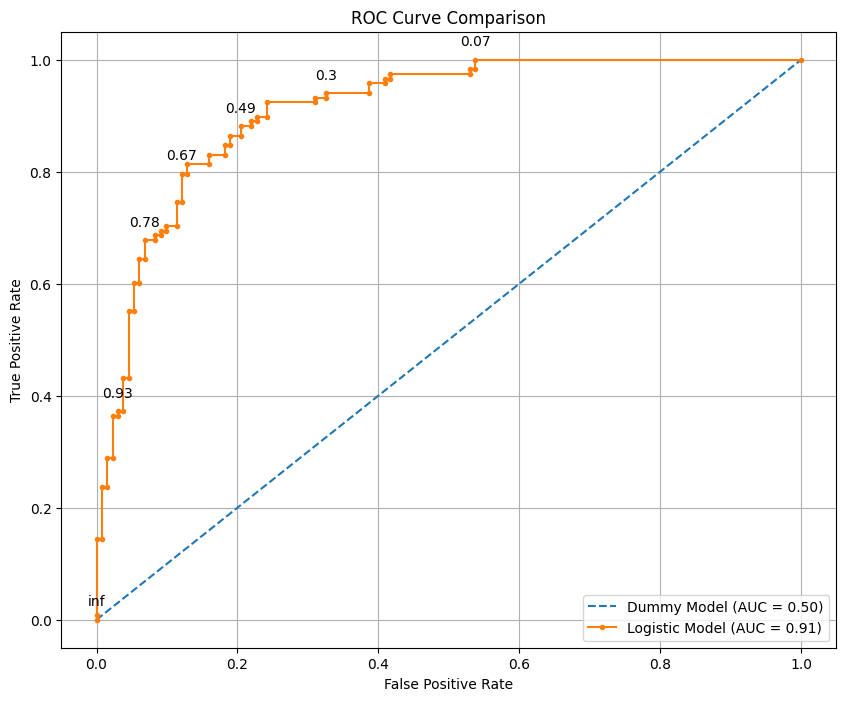

In [58]:
# plot the roc curve for the model
fig = plt.figure(figsize=(10, 8))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model (AUC = %0.2f)' % dummy_model_auc)
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Model (AUC = %0.2f)' % model_auc)

#Lets plot thresholds
for i in range(0, len(threshold), 10):
    plt.annotate(text=np.round(threshold[i], 2), 
                 xy=(model_fpr[i], model_tpr[i]),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')  # Explicit legend call with location
plt.grid(True)
plt.show()